In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# **Q.4 A first Gibbs sampler**

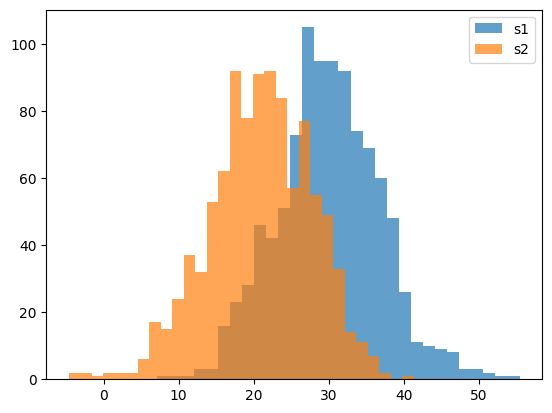

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Set up hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players
beta = 4.166  # variance for performance difference

#t is initial guess, intial guess of t used to sample from s1, s2 --> then t. (t is given)

# Function to sample s1 given s2 and t
def sample_s1(s2, t, mu, sigma, beta):
    # Conditional mean and variance for s1 given t and s2
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    # print(cond_var)
    cond_mean = cond_var * ((mu / sigma**2) + (t + s2) / beta**2)
    # print(cond_mean)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample s2 given s1 and t
def sample_s2(s1, t, mu, sigma, beta):
    # Conditional mean and variance for s2 given t and s1
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    cond_mean = cond_var * ((mu / sigma**2) + (s1 - t) / beta**2)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample t (the performance difference) using truncated normal
def sample_t(s1, s2, beta, y):
    mean_t = s1 - s2
    if y == 1:
        a, b = 0, np.inf  # t is truncated at 0 from below
    else:
        a, b = -np.inf, 0  # t is truncated at 0 from above
    t = stats.truncnorm.rvs(a=(a - mean_t) / beta, b=(b - mean_t) / beta, loc=mean_t, scale=beta) #SciPy's function is based on standardized bounds for N(0,1)
    return t


# Step 2: Gibbs Sampler core
def gibbs_sampler(num_iterations, y):
    # Initialize s1 and s2 with their prior means
    s1 = mu
    s2 = mu
    t = 0 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []
    iterations = []

    for i in range(num_iterations):

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu, sigma, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu, sigma, beta)

        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        # Append samples to lists
        samples_s1.append(s1)
        samples_s2.append(s2)
        iterations.append(i)

    return np.array(samples_s1), np.array(samples_s2), iterations

# Example: Run Gibbs Sampler with 1000 iterations
num_iterations = 1000
y = 1  # Player 1 wins
samples_s1, samples_s2, iterations = gibbs_sampler(num_iterations, y)

# Plot histograms of the samples for s1 and s2
plt.figure(1)
plt.hist(samples_s1, bins=30, alpha=0.7, label='s1')
plt.hist(samples_s2, bins=30, alpha=0.7, label='s2')
plt.legend()
plt.show()

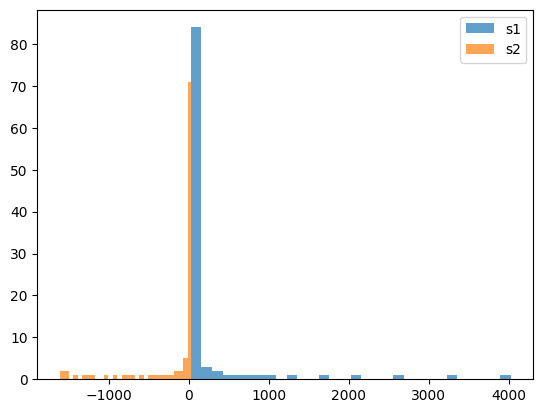

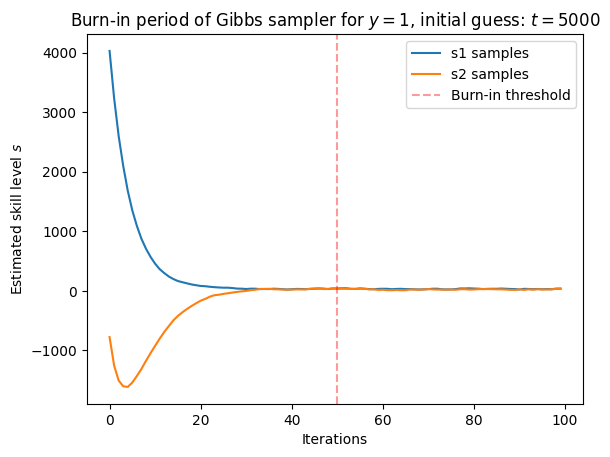

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Set up hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players
beta = 4.166  # variance for performance difference

#t is initial guess, intial guess of t used to sample from s1, s2 --> then t. (t is given)

# Function to sample s1 given s2 and t
def sample_s1(s2, t, mu, sigma, beta):
    # Conditional mean and variance for s1 given t and s2
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    # print(cond_var)
    cond_mean = cond_var * ((mu / sigma**2) + (t + s2) / beta**2)
    # print(cond_mean)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample s2 given s1 and t
def sample_s2(s1, t, mu, sigma, beta):
    # Conditional mean and variance for s2 given t and s1
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    cond_mean = cond_var * ((mu / sigma**2) + (s1 - t) / beta**2)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample t (the performance difference) using truncated normal
def sample_t(s1, s2, beta, y):
    mean_t = s1 - s2
    if y == 1:
        a, b = 0, np.inf  # t is truncated at 0 from below
    else:
        a, b = -np.inf, 0  # t is truncated at 0 from above
    t = stats.truncnorm.rvs(a=(a - mean_t) / beta, b=(b - mean_t) / beta, loc=mean_t, scale=beta) #SciPy's function is based on standardized bounds for N(0,1)
    return t


# Step 2: Gibbs Sampler core
def gibbs_sampler(num_iterations, y):
    # Initialize s1 and s2 with their prior means
    s1 = mu
    s2 = mu
    t = 5000 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []
    iterations = []

    for i in range(num_iterations):

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu, sigma, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu, sigma, beta)

        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        samples_s1.append(s1)
        samples_s2.append(s2)
        iterations.append(i)

    return np.array(samples_s1), np.array(samples_s2), iterations

# Example: Run Gibbs Sampler with 1000 iterations
num_iterations = 100
y = 1  # Player 1 wins
burn_in = 50
samples_s1, samples_s2, iterations = gibbs_sampler(num_iterations, y)

# Plot histograms of the samples for s1 and s2
plt.figure(1)
plt.hist(samples_s1, bins=30, alpha=0.7, label='s1')
plt.hist(samples_s2, bins=30, alpha=0.7, label='s2')
plt.legend()

plt.figure(2)
plt.title(r"Burn-in period of Gibbs sampler for $y=1$, initial guess: $t = 5000$")
plt.xlabel("Iterations")
plt.ylabel(r"Estimated skill level $s$")
plt.plot(iterations, samples_s1, label ='s1 samples')
plt.plot(iterations, samples_s2, label ='s2 samples')
plt.axvline(x=burn_in, color='red', linestyle='--', label='Burn-in threshold', alpha=0.4)
plt.legend()
plt.show()

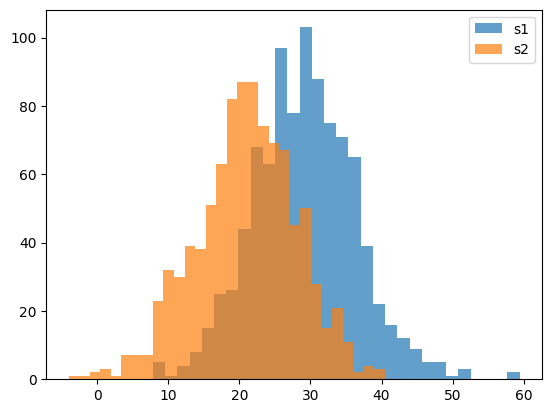

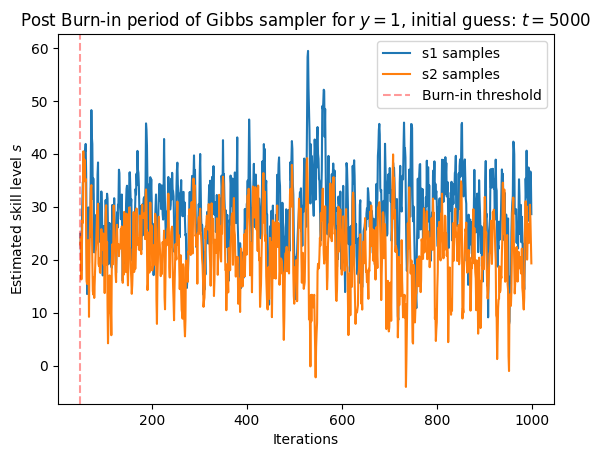

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Set up hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players
beta = 4.166  # variance for performance difference

#t is initial guess, intial guess of t used to sample from s1, s2 --> then t. (t is given)

# Function to sample s1 given s2 and t
def sample_s1(s2, t, mu, sigma, beta):
    # Conditional mean and variance for s1 given t and s2
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    # print(cond_var)
    cond_mean = cond_var * ((mu / sigma**2) + (t + s2) / beta**2)
    # print(cond_mean)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample s2 given s1 and t
def sample_s2(s1, t, mu, sigma, beta):
    # Conditional mean and variance for s2 given t and s1
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    cond_mean = cond_var * ((mu / sigma**2) + (s1 - t) / beta**2)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample t (the performance difference) using truncated normal
def sample_t(s1, s2, beta, y):
    mean_t = s1 - s2
    if y == 1:
        a, b = 0, np.inf  # t is truncated at 0 from below
    else:
        a, b = -np.inf, 0  # t is truncated at 0 from above
    t = stats.truncnorm.rvs(a=(a - mean_t) / beta, b=(b - mean_t) / beta, loc=mean_t, scale=beta) #SciPy's function is based on standardized bounds for N(0,1)
    return t


# Step 2: Gibbs Sampler core
def gibbs_sampler(num_iterations, y, burn_in):
    # Initialize s1 and s2 with their prior means
    s1 = mu
    s2 = mu
    t = 5000 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []
    iterations = []

    for i in range(num_iterations):

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu, sigma, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu, sigma, beta)

        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        # Append samples to lists (after burn-in)
        if i >= burn_in:
            # Append samples to lists
            samples_s1.append(s1)
            samples_s2.append(s2)
            iterations.append(i)

    return np.array(samples_s1), np.array(samples_s2), iterations

# Example: Run Gibbs Sampler with 1000 iterations
num_iterations = 1000
y = 1  # Player 1 wins
burn_in = 50
samples_s1, samples_s2, iterations = gibbs_sampler(num_iterations, y, burn_in)

# Plot histograms of the samples for s1 and s2
plt.figure(1)
plt.hist(samples_s1, bins=30, alpha=0.7, label='s1')
plt.hist(samples_s2, bins=30, alpha=0.7, label='s2')
plt.legend()

plt.figure(2)
plt.title(r"Post Burn-in period of Gibbs sampler for $y=1$, initial guess: $t = 5000$")
plt.xlabel("Iterations")
plt.ylabel(r"Estimated skill level $s$")
plt.plot(iterations, samples_s1, label ='s1 samples')
plt.plot(iterations, samples_s2, label ='s2 samples')
plt.axvline(x=burn_in, color='red', linestyle='--', label='Burn-in threshold', alpha=0.4)
plt.legend()
plt.show()

# **Q.5 Assumed Density Filtering (Moment matching)**

In [ ]:
# Loading in the raw SerieA file url from Github
#Can be accessed from: https://github.com/dannem1337/APML-Project/blob/main/data/SerieA.csv
#Copy "Raw"
import pandas as pd

url = 'https://raw.githubusercontent.com/dannem1337/APML-Project/refs/heads/main/data/SerieA.csv?token=GHSAT0AAAAAACXOR42WTMF422SMTEA3XBPYZXWLCXA'
serieA = pd.read_csv(url, na_values='?', dtype={'ID': str}).dropna()
print(serieA)

     yyyy-mm-dd  HH:MM       team1     team2  score1  score2
0    2018-08-18  18:00      Chievo  Juventus       2       3
1    2018-08-18  20:30       Lazio    Napoli       1       2
2    2018-08-19  18:00      Torino      Roma       0       1
3    2018-08-19  20:30    Sassuolo     Inter       1       0
4    2018-08-19  20:30       Parma   Udinese       2       2
..          ...    ...         ...       ...     ...     ...
375  2019-05-26  20:30        Roma     Parma       2       1
376  2019-05-26  20:30       Inter    Empoli       2       1
377  2019-05-26  20:30  Fiorentina     Genoa       0       0
378  2019-05-26  20:30    Cagliari   Udinese       1       2
379  2019-05-26  20:30    Atalanta  Sassuolo       3       1

[380 rows x 6 columns]


In [ ]:
url = 'https://raw.githubusercontent.com/dannem1337/APML-Project/refs/heads/main/data/SerieA.csv?token=GHSAT0AAAAAACXOR42WTMF422SMTEA3XBPYZXWLCXA'
serieA2 = pd.read_csv(url, na_values='?', dtype={'ID': str}).dropna()
print(serieA2)

     yyyy-mm-dd  HH:MM       team1     team2  score1  score2
0    2018-08-18  18:00      Chievo  Juventus       2       3
1    2018-08-18  20:30       Lazio    Napoli       1       2
2    2018-08-19  18:00      Torino      Roma       0       1
3    2018-08-19  20:30    Sassuolo     Inter       1       0
4    2018-08-19  20:30       Parma   Udinese       2       2
..          ...    ...         ...       ...     ...     ...
375  2019-05-26  20:30        Roma     Parma       2       1
376  2019-05-26  20:30       Inter    Empoli       2       1
377  2019-05-26  20:30  Fiorentina     Genoa       0       0
378  2019-05-26  20:30    Cagliari   Udinese       1       2
379  2019-05-26  20:30    Atalanta  Sassuolo       3       1

[380 rows x 6 columns]


In [ ]:
serieA2['winner'] = serieA2.apply(lambda x: x['team2'] if x['score1'] < x['score2']
                     else (x['team1'] if x['score1'] > x['score2'] else 'TIE'), axis=1)

# Drop rows with 'TIE'
serieA2.drop(serieA2.loc[serieA2['winner'] == 'TIE'].index, inplace=True)

serieA2['y'] = serieA2.apply((lambda x: 1 if x['winner'] == x['team1'] else -1), axis=1)

# Reset index and reassign
serieA2.reset_index(drop=True, inplace=True)

# Assuming you already have the dataframe 'df'
# Create a new column 'loser' which is the team that lost
serieA2['loser'] = serieA2.apply(lambda row: row['team1'] if row['winner'] == row['team2'] else row['team2'], axis=1)

# Calculate wins: count how many times each team appears as the winner
wins = serieA2['winner'].value_counts().reset_index()
wins.columns = ['team', 'wins']

# Calculate losses: count how many times each team appears as the loser
losses = serieA2['loser'].value_counts().reset_index()
losses.columns = ['team', 'losses']

# Merge the wins and losses dataframes
team_stats = pd.merge(wins, losses, on='team', how='outer').fillna(0)

# Convert wins and losses to integer type
team_stats['wins'] = team_stats['wins'].astype(int)
team_stats['losses'] = team_stats['losses'].astype(int)
print(team_stats)

          team  wins  losses
0     Juventus    28       4
1       Napoli    24       7
2     Atalanta    20       9
3        Inter    20       9
4        Milan    19       8
5         Roma    18       8
6        Lazio    17      13
7       Torino    16       7
8    Sampdoria    15      15
9         Spal    11      18
10     Udinese    11      17
11     Bologna    11      16
12      Empoli    10      20
13    Cagliari    10      17
14       Parma    10      17
15    Sassuolo     9      13
16       Genoa     8      16
17  Fiorentina     8      13
18   Frosinone     5      23
19      Chievo     2      22


In [ ]:
serieA['winner'] = serieA.apply(lambda x: x['team2'] if x['score1'] < x['score2']
                     else (x['team1'] if x['score1'] > x['score2'] else 'TIE'), axis=1)

# Drop rows with 'TIE'
serieA.drop(serieA.loc[serieA['winner'] == 'TIE'].index, inplace=True)

serieA['y'] = serieA.apply((lambda x: 1 if x['winner'] == x['team1'] else -1), axis=1)

# serieA.drop(serieA[['yyyy-mm-dd', 'HH:MM', 'score1', 'score2']])

# Reset index and reassign
serieA.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(serieA)

     yyyy-mm-dd  HH:MM     team1     team2  score1  score2    winner  y
0    2018-08-18  18:00    Chievo  Juventus       2       3  Juventus -1
1    2018-08-18  20:30     Lazio    Napoli       1       2    Napoli -1
2    2018-08-19  18:00    Torino      Roma       0       1      Roma -1
3    2018-08-19  20:30  Sassuolo     Inter       1       0  Sassuolo  1
4    2018-08-19  20:30    Empoli  Cagliari       2       0    Empoli  1
..          ...    ...       ...       ...     ...     ...       ... ..
267  2019-05-26  20:30      Spal     Milan       2       3     Milan -1
268  2019-05-26  20:30      Roma     Parma       2       1      Roma  1
269  2019-05-26  20:30     Inter    Empoli       2       1     Inter  1
270  2019-05-26  20:30  Cagliari   Udinese       1       2   Udinese -1
271  2019-05-26  20:30  Atalanta  Sassuolo       3       1  Atalanta  1

[272 rows x 8 columns]


In [ ]:
teams1 = serieA['team1'].unique()

All_teams = sorted(teams1)

#Hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players

All_teams_dict = {}

for i in All_teams:
    All_teams_dict[i] = mu, sigma

All_teams_dict

{'Atalanta': (25, 8.333),
 'Bologna': (25, 8.333),
 'Cagliari': (25, 8.333),
 'Chievo': (25, 8.333),
 'Empoli': (25, 8.333),
 'Fiorentina': (25, 8.333),
 'Frosinone': (25, 8.333),
 'Genoa': (25, 8.333),
 'Inter': (25, 8.333),
 'Juventus': (25, 8.333),
 'Lazio': (25, 8.333),
 'Milan': (25, 8.333),
 'Napoli': (25, 8.333),
 'Parma': (25, 8.333),
 'Roma': (25, 8.333),
 'Sampdoria': (25, 8.333),
 'Sassuolo': (25, 8.333),
 'Spal': (25, 8.333),
 'Torino': (25, 8.333),
 'Udinese': (25, 8.333)}

In [ ]:
game1 = serieA.iloc[0][['team1', 'team2', 'winner']].to_list()
print(game1)

for i in game1:
    print(f"{i} : {All_teams_dict[i]}")

['Chievo', 'Juventus', 'Juventus']
Chievo : (25, 8.333)
Juventus : (25, 8.333)
Juventus : (25, 8.333)


In [ ]:
# x,y = All_teams_dict['Juventus']
# print(x,y)

In [ ]:
# for index, row in serieA.iterrows():
#     print(row['team1'], "-", row['team2'], "| winner:", row['winner'], "=>", row['y'])

In [ ]:
beta = 4.1666

# Function to sample s1 given s2 and t
def sample_s1(s2, t, mu, sigma, beta):
    # Conditional mean and variance for s1 given t and s2
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    # print(cond_var)
    cond_mean = cond_var * ((mu / sigma**2) + (t + s2) / beta**2)
    # print(cond_mean)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample s2 given s1 and t
def sample_s2(s1, t, mu, sigma, beta):
    # Conditional mean and variance for s2 given t and s1
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    cond_mean = cond_var * ((mu / sigma**2) + (s1 - t) / beta**2)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample t (the performance difference) using truncated normal
def sample_t(s1, s2, beta, y):
    mean_t = s1 - s2
    if y == 1:
        a, b = 0, np.inf  # t is truncated at 0 from below
    else:
        a, b = -np.inf, 0  # t is truncated at 0 from above
    t = stats.truncnorm.rvs(a=(a - mean_t) / beta, b=(b - mean_t) / beta, loc=mean_t, scale=beta) #SciPy's function is based on standardized bounds for N(0,1)
    return t

def serieA_gibbs_sampler(num_iterations, y, burn_in, mu1, mu2, sigma1, sigma2):
    # Initialize s1 and s2 with their prior means
    s1 = mu1
    s2 = mu2
    t = 0 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []

    for i in range(num_iterations):

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu1, sigma1, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu2, sigma2, beta)

        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        # Append samples to lists (after burn-in)
        if i >= burn_in:
            # Append samples to lists
            samples_s1.append(s1)
            samples_s2.append(s2)

    return np.array(samples_s1), np.array(samples_s2)

def update_ranking(teams_dict, y, team1, team2, mu1, mu2, sigma1, sigma2):
    num_iterations = 10000
    burn_in = 50
    samples_s1, samples_s2 = serieA_gibbs_sampler(num_iterations, y, burn_in, mu1, mu2, sigma1, sigma2)

    teams_dict[team1] = np.mean(samples_s1), np.std(samples_s1) #New mu is based on the average of the distributions
    teams_dict[team2] = np.mean(samples_s2), np.std(samples_s2) #Not sure if this is the way it's supposed to be used

#"MAIN" for running update_ranking function
#Iterate over each row and update the mu for each team
for index, row in serieA.iterrows():
        y = row['y']
        team1 = row['team1']
        team2 = row['team2']
        mu1, sigma1 = All_teams_dict[team1]
        mu2, sigma2 = All_teams_dict[team2]

        update_ranking(All_teams_dict, y, team1, team2, mu1, mu2, sigma1, sigma2)

print(All_teams_dict)

{'Atalanta': (28.202174606839083, 1.31606304117427), 'Bologna': (24.514744991879937, 1.3733313238247282), 'Cagliari': (22.93929239851223, 1.3938982375898468), 'Chievo': (17.72542572038744, 2.2090966550403945), 'Empoli': (23.838713101391058, 1.2855847233366458), 'Fiorentina': (22.39756805795065, 1.5166338526055994), 'Frosinone': (20.24807491131503, 1.5919790390246884), 'Genoa': (23.591380845516383, 1.4822926478178355), 'Inter': (27.67985090006798, 1.3622216089906443), 'Juventus': (28.93778291339576, 1.8208713701883945), 'Lazio': (25.54674580444079, 1.3432380749968773), 'Milan': (28.46856659944366, 1.5320230181426062), 'Napoli': (29.079254430901546, 1.541502690727717), 'Parma': (22.992665006333386, 1.337759393127801), 'Roma': (26.99200006539188, 1.3362607151241999), 'Sampdoria': (24.582735798265993, 1.256493811962777), 'Sassuolo': (22.535021370737205, 1.6620113788585955), 'Spal': (24.317469051056733, 1.37272515830802), 'Torino': (27.630246317021342, 1.4967963805820756), 'Udinese': (23.77

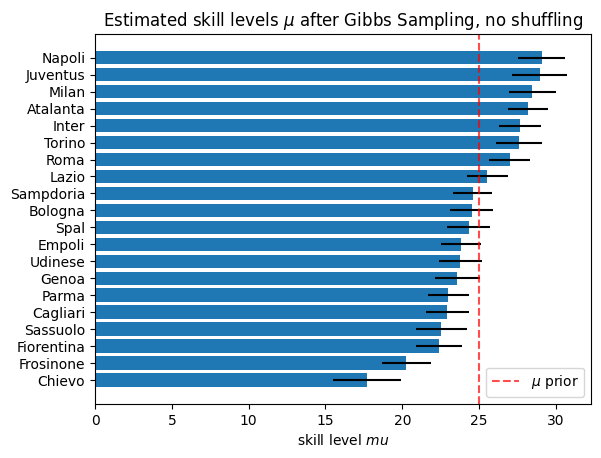

In [ ]:
teams_sorted_by_skill = dict(sorted(All_teams_dict.items(), key=lambda x: x[1][0]))

sorted_teams_list = list(teams_sorted_by_skill.keys())
sorted_skills_list = [i[0] for i in list(teams_sorted_by_skill.values())]
sorted_uncertainty_list = [i[1] for i in list(teams_sorted_by_skill.values())]

plt.barh(sorted_teams_list, sorted_skills_list, xerr=sorted_uncertainty_list)
plt.axvline(x=25, color='red', linestyle='--', label=r'$\mu$ prior', alpha=0.7)

plt.title(r'Estimated skill levels $\mu$ after Gibbs Sampling, no shuffling')
plt.xlabel('skill level $mu$')
plt.legend()
plt.show()

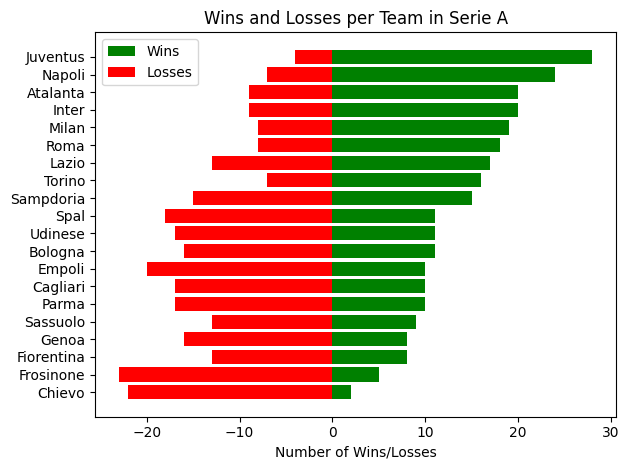

In [ ]:
# Sort the data by wins for a clearer visualization
team_stats = team_stats.sort_values('wins', ascending=True)

# Plot wins as horizontal bars
plt.barh(team_stats['team'], team_stats['wins'], color='green', label='Wins')

# Plot losses as horizontal bars, slightly shifted to the right for better visibility
plt.barh(team_stats['team'], -team_stats['losses'], color='red', label='Losses')

# Add labels and title
plt.xlabel('Number of Wins/Losses')
plt.title('Wins and Losses per Team in Serie A')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# shuffle the DataFrame rows
shuffled_serieA = serieA.sample(frac = 1)
shuffled_serieA

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,winner,y
61,2018-10-07,15:00,Lazio,Fiorentina,1,0,Lazio,1
225,2019-04-13,20:30,Milan,Lazio,1,0,Milan,1
36,2018-09-23,15:00,Bologna,Roma,2,0,Bologna,1
224,2019-04-13,18:00,Roma,Udinese,1,0,Roma,1
79,2018-11-03,20:30,Juventus,Cagliari,3,1,Juventus,1
...,...,...,...,...,...,...,...,...
12,2018-08-26,20:30,Fiorentina,Chievo,6,1,Fiorentina,1
207,2019-03-31,18:00,Bologna,Sassuolo,2,1,Bologna,1
87,2018-11-11,12:30,Atalanta,Inter,4,1,Atalanta,1
80,2018-11-04,12:30,Lazio,Spal,4,1,Lazio,1


In [ ]:
teams1 = shuffled_serieA['team1'].unique()

All_teams = sorted(teams1)

#Hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players

Shuffled_teams_dict = {}

for i in All_teams:
    Shuffled_teams_dict[i] = mu, sigma

Shuffled_teams_dict

{'Atalanta': (25, 8.333),
 'Bologna': (25, 8.333),
 'Cagliari': (25, 8.333),
 'Chievo': (25, 8.333),
 'Empoli': (25, 8.333),
 'Fiorentina': (25, 8.333),
 'Frosinone': (25, 8.333),
 'Genoa': (25, 8.333),
 'Inter': (25, 8.333),
 'Juventus': (25, 8.333),
 'Lazio': (25, 8.333),
 'Milan': (25, 8.333),
 'Napoli': (25, 8.333),
 'Parma': (25, 8.333),
 'Roma': (25, 8.333),
 'Sampdoria': (25, 8.333),
 'Sassuolo': (25, 8.333),
 'Spal': (25, 8.333),
 'Torino': (25, 8.333),
 'Udinese': (25, 8.333)}

In [ ]:
# Function to sample s1 given s2 and t
def sample_s1(s2, t, mu, sigma, beta):
    # Conditional mean and variance for s1 given t and s2
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    # print(cond_var)
    cond_mean = cond_var * ((mu / sigma**2) + (t + s2) / beta**2)
    # print(cond_mean)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample s2 given s1 and t
def sample_s2(s1, t, mu, sigma, beta):
    # Conditional mean and variance for s2 given t and s1
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    cond_mean = cond_var * ((mu / sigma**2) + (s1 - t) / beta**2)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample t (the performance difference) using truncated normal
def sample_t(s1, s2, beta, y):
    mean_t = s1 - s2
    if y == 1:
        a, b = 0, np.inf  # t is truncated at 0 from below
    else:
        a, b = -np.inf, 0  # t is truncated at 0 from above
    t = stats.truncnorm.rvs(a=(a - mean_t) / beta, b=(b - mean_t) / beta, loc=mean_t, scale=beta) #SciPy's function is based on standardized bounds for N(0,1)
    return t

def serieA_gibbs_sampler(num_iterations, y, burn_in, mu1, mu2, sigma1, sigma2):
    # Initialize s1 and s2 with their prior means
    s1 = mu1
    s2 = mu2
    t = 0 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []

    for i in range(num_iterations):

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu1, sigma1, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu2, sigma2, beta)

        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        # Append samples to lists (after burn-in)
        if i >= burn_in:
            # Append samples to lists
            samples_s1.append(s1)
            samples_s2.append(s2)

    return np.array(samples_s1), np.array(samples_s2)

def update_ranking(teams_dict, y, team1, team2, mu1, mu2, sigma1, sigma2):
    num_iterations = 10000
    burn_in = 50
    samples_s1, samples_s2 = serieA_gibbs_sampler(num_iterations, y, burn_in, mu1, mu2, sigma1, sigma2)

    teams_dict[team1] = np.mean(samples_s1), np.std(samples_s1)
    teams_dict[team2] = np.mean(samples_s2), np.std(samples_s2)

#"MAIN" for running update_ranking function
#Iterate over each row and update the mu for each team
for index, row in shuffled_serieA.iterrows():
        y = row['y']
        team1 = row['team1']
        team2 = row['team2']
        mu1, sigma1 = Shuffled_teams_dict[team1]
        mu2, sigma2 = Shuffled_teams_dict[team2]

        update_ranking(Shuffled_teams_dict, y, team1, team2, mu1, mu2, sigma1, sigma2)

print(Shuffled_teams_dict)

{'Atalanta': (28.32647200041472, 1.2924353827688613), 'Bologna': (24.363686500458748, 1.3507541300963832), 'Cagliari': (22.791779769782664, 1.375852944455566), 'Chievo': (17.42996031469561, 2.12210262949345), 'Empoli': (23.746782451067617, 1.27306976337183), 'Fiorentina': (22.54663580437249, 1.4865593715780288), 'Frosinone': (20.186593048506726, 1.5644384225086636), 'Genoa': (24.330431368330498, 1.4241509037277538), 'Inter': (27.396701637476696, 1.322508155164372), 'Juventus': (29.47905628560597, 1.7078680635679733), 'Lazio': (25.801745715753192, 1.318091985678707), 'Milan': (28.578018027936466, 1.4930452703521016), 'Napoli': (28.664881108643968, 1.4751245064821912), 'Parma': (22.66251384412325, 1.2923194024529803), 'Roma': (27.113671741627172, 1.3160588553982655), 'Sampdoria': (24.47628125253161, 1.2444791139085345), 'Sassuolo': (22.240985721138216, 1.597412597000062), 'Spal': (24.0473607703102, 1.353205955469347), 'Torino': (27.676092023874784, 1.486252380123311), 'Udinese': (24.1315

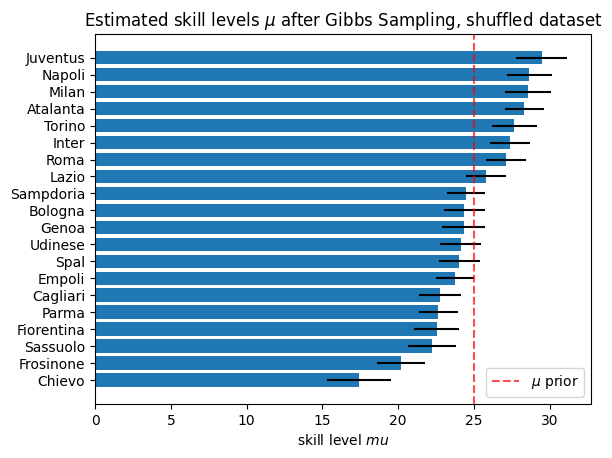

In [ ]:
teams_sorted_by_skill = dict(sorted(Shuffled_teams_dict.items(), key=lambda x: x[1][0]))

sorted_teams_list = list(teams_sorted_by_skill.keys())
sorted_skills_list = [i[0] for i in list(teams_sorted_by_skill.values())]
sorted_uncertainty_list = [i[1] for i in list(teams_sorted_by_skill.values())]

plt.barh(sorted_teams_list, sorted_skills_list, xerr=sorted_uncertainty_list)
plt.axvline(x=25, color='red', linestyle='--', label=r'$\mu$ prior', alpha=0.7)

plt.title(r'Estimated skill levels $\mu$ after Gibbs Sampling, shuffled dataset')
plt.xlabel('skill level $mu$')
plt.legend()
plt.show()

In [ ]:
All_teams_dict

{'Atalanta': (28.202174606839083, 1.31606304117427),
 'Bologna': (24.514744991879937, 1.3733313238247282),
 'Cagliari': (22.93929239851223, 1.3938982375898468),
 'Chievo': (17.72542572038744, 2.2090966550403945),
 'Empoli': (23.838713101391058, 1.2855847233366458),
 'Fiorentina': (22.39756805795065, 1.5166338526055994),
 'Frosinone': (20.24807491131503, 1.5919790390246884),
 'Genoa': (23.591380845516383, 1.4822926478178355),
 'Inter': (27.67985090006798, 1.3622216089906443),
 'Juventus': (28.93778291339576, 1.8208713701883945),
 'Lazio': (25.54674580444079, 1.3432380749968773),
 'Milan': (28.46856659944366, 1.5320230181426062),
 'Napoli': (29.079254430901546, 1.541502690727717),
 'Parma': (22.992665006333386, 1.337759393127801),
 'Roma': (26.99200006539188, 1.3362607151241999),
 'Sampdoria': (24.582735798265993, 1.256493811962777),
 'Sassuolo': (22.535021370737205, 1.6620113788585955),
 'Spal': (24.317469051056733, 1.37272515830802),
 'Torino': (27.630246317021342, 1.4967963805820756),

In [ ]:
Shuffled_teams_dict

{'Atalanta': (28.32647200041472, 1.2924353827688613),
 'Bologna': (24.363686500458748, 1.3507541300963832),
 'Cagliari': (22.791779769782664, 1.375852944455566),
 'Chievo': (17.42996031469561, 2.12210262949345),
 'Empoli': (23.746782451067617, 1.27306976337183),
 'Fiorentina': (22.54663580437249, 1.4865593715780288),
 'Frosinone': (20.186593048506726, 1.5644384225086636),
 'Genoa': (24.330431368330498, 1.4241509037277538),
 'Inter': (27.396701637476696, 1.322508155164372),
 'Juventus': (29.47905628560597, 1.7078680635679733),
 'Lazio': (25.801745715753192, 1.318091985678707),
 'Milan': (28.578018027936466, 1.4930452703521016),
 'Napoli': (28.664881108643968, 1.4751245064821912),
 'Parma': (22.66251384412325, 1.2923194024529803),
 'Roma': (27.113671741627172, 1.3160588553982655),
 'Sampdoria': (24.47628125253161, 1.2444791139085345),
 'Sassuolo': (22.240985721138216, 1.597412597000062),
 'Spal': (24.0473607703102, 1.353205955469347),
 'Torino': (27.676092023874784, 1.486252380123311),
 

# **Q6 Using the model for predictions**

In [ ]:
teams1 = serieA['team1'].unique()

All_teams = sorted(teams1)

#Hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players

All_teams_clean_dict = {}

for i in All_teams:
    All_teams_clean_dict[i] = mu, sigma

All_teams_clean_dict

{'Atalanta': (25, 8.333),
 'Bologna': (25, 8.333),
 'Cagliari': (25, 8.333),
 'Chievo': (25, 8.333),
 'Empoli': (25, 8.333),
 'Fiorentina': (25, 8.333),
 'Frosinone': (25, 8.333),
 'Genoa': (25, 8.333),
 'Inter': (25, 8.333),
 'Juventus': (25, 8.333),
 'Lazio': (25, 8.333),
 'Milan': (25, 8.333),
 'Napoli': (25, 8.333),
 'Parma': (25, 8.333),
 'Roma': (25, 8.333),
 'Sampdoria': (25, 8.333),
 'Sassuolo': (25, 8.333),
 'Spal': (25, 8.333),
 'Torino': (25, 8.333),
 'Udinese': (25, 8.333)}

In [ ]:
def prediction(mu1, mu2):
    return 1 if mu1 > mu2 else -1

correct_guess = 0
total_guess = 0

#Iterate over each row and update the mu for each team
for index, row in serieA.iterrows():
        y = row['y']
        team1 = row['team1']
        team2 = row['team2']
        mu1, sigma1 = All_teams_clean_dict[team1]
        mu2, sigma2 = All_teams_clean_dict[team2]

        pred = prediction(mu1, mu2)
        if pred == y:
            correct_guess += 1

        update_ranking(All_teams_clean_dict, y, team1, team2, mu1, mu2, sigma1, sigma2)

        total_guess += 1

print(All_teams_clean_dict)
print(f"total guesses = {total_guess}")
print(f"correct guesses = {correct_guess}")
print(f"r = {correct_guess/total_guess}")

{'Atalanta': (28.367080433385887, 1.3242109292802449), 'Bologna': (24.803643845636568, 1.4223256331746965), 'Cagliari': (23.235619501345646, 1.3520630206121167), 'Chievo': (18.084765225601743, 2.1343082584738653), 'Empoli': (23.939242156728216, 1.3090346172811362), 'Fiorentina': (22.4831441518556, 1.4515236314925715), 'Frosinone': (20.3269884706185, 1.5263020128462315), 'Genoa': (23.69637846792043, 1.435114244839472), 'Inter': (27.990005831118403, 1.3456048591539698), 'Juventus': (28.573340941654852, 1.8206158587049672), 'Lazio': (25.743618296996022, 1.2989405187290648), 'Milan': (28.597315176373925, 1.490924657551), 'Napoli': (29.267468500335013, 1.5260561477930452), 'Parma': (23.003983668111978, 1.3264000319769904), 'Roma': (27.122788171642554, 1.3459582257784484), 'Sampdoria': (24.66606231184896, 1.2564379631701843), 'Sassuolo': (22.64599134757106, 1.6471462087319049), 'Spal': (24.23489315822792, 1.339014275488921), 'Torino': (27.876758599211495, 1.4547827568664222), 'Udinese': (23.

#Q.9 Your own data

In [ ]:
import pandas as pd
import os
from google.colab import drive
if not os.path.isdir('/content/drive'):
  drive.mount('/content/drive')
  os.chdir('drive/MyDrive/mums')
  os.getcwd()
  !ls

data_fights = pd.read_csv('fights_with_winner.csv', delimiter=';')
data_fighters = pd.read_csv('ufc-fighters-statistics.csv', delimiter=',')

data_fights = data_fights.dropna(subset=['Winner'])
data_fights.reset_index(inplace = True, drop = True)

data_fighters = data_fighters[['name','wins','losses','draws']]
data_fighters = data_fighters.drop_duplicates(subset='name', keep='first')

# Assuming data_fighters and data_fights are already loaded

# Step 1: Extract the unique names from R_fighter and B_fighter columns in data_fights
fighters_in_fights = pd.concat([data_fights['R_fighter'], data_fights['B_fighter']]).unique()

# Step 2: Filter data_fighters to keep only rows where 'name' appears in fighters_in_fights
filtered_fighters = data_fighters[data_fighters['name'].isin(fighters_in_fights)]
filtered_fighters.reset_index(inplace = True, drop = True)
# Now `filtered_fighters` contains only the fighters that appear in R_fighter or B_fighter

#Add new column y
data_fights['y'] = data_fights.apply((lambda x: 1 if x['Winner'] == x['R_fighter'] else -1), axis=1)
print(data_fights)

#adding 0.5 to (win/total matches) and times 25 for adequate prior
filtered_fighters['prior skill'] = filtered_fighters.apply(lambda x: ((x['wins']/(x['wins']+x['losses']+x['draws'])+0.5)*25), axis=1)

print(filtered_fighters)



          R_fighter           B_fighter             Winner  y
0      Adrian Yanez       Gustavo Lopez       Adrian Yanez  1
1      Trevin Giles       Roman Dolidze       Trevin Giles  1
2       Tai Tuivasa     Harry Hunsucker        Tai Tuivasa  1
3     Cheyanne Buys   Montserrat Conejo  Montserrat Conejo -1
4     Marion Reneau       Macy Chiasson      Macy Chiasson -1
...             ...                 ...                ... ..
5897  Remco Pardoel  Alberta Cerra Leon      Remco Pardoel  1
5898   Orlando Wiet    Robert Lucarelli       Orlando Wiet  1
5899  Johnny Rhodes       David Levicki      Johnny Rhodes  1
5900  Patrick Smith          Ray Wizard      Patrick Smith  1
5901   Scott Morris      Sean Daugherty       Scott Morris  1

[5902 rows x 4 columns]
                   name  wins  losses  draws  prior skill
0      Gerald Strebendt     9       7      0    26.562500
1            Neil Grove    12       8      1    26.785714
2         Ian Entwistle     9       3      0    31.250000

<ipython-input-36-750518b96967>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_fighters['prior skill'] = filtered_fighters.apply(lambda x: ((x['wins']/(x['wins']+x['losses']+x['draws'])+0.5)*25), axis=1)


In [ ]:
all_fighters_dict = {}

sigma = 8.333

names = filtered_fighters['name']

prior_skills = filtered_fighters['prior skill']


for i in range(len(names)):
  all_fighters_dict[names[i]] = prior_skills[i], sigma

all_fighters_dict

{'Gerald Strebendt': (26.5625, 8.333),
 'Neil Grove': (26.785714285714285, 8.333),
 'Ian Entwistle': (31.25, 8.333),
 'Josh Rafferty': (25.735294117647058, 8.333),
 'Jeff Newton': (29.166666666666664, 8.333),
 'Ansar Chalangov': (30.92105263157895, 8.333),
 'Paul Sass': (34.375, 8.333),
 'James Lee': (33.333333333333336, 8.333),
 'Jason Black': (33.035714285714285, 8.333),
 'John Albert': (26.136363636363637, 8.333),
 'David Terrell': (31.25, 8.333),
 'Rob MacDonald': (26.38888888888889, 8.333),
 'Matt Arroyo': (25.0, 8.333),
 'Colin Robinson': (23.863636363636363, 8.333),
 'Justin Levens': (27.20588235294118, 8.333),
 'Mike Ciesnolevicz': (33.152173913043484, 8.333),
 'Alex Schoenauer': (27.500000000000004, 8.333),
 'TJ Waldburger': (28.500000000000004, 8.333),
 'Ronda Rousey': (33.92857142857143, 8.333),
 'Keith Rockel': (30.147058823529417, 8.333),
 'Mark Hughes': (31.25, 8.333),
 'Jimmy Flick': (29.891304347826086, 8.333),
 'Branden Lee Hinkle': (27.67857142857143, 8.333),
 'Genki 

In [ ]:
import numpy as np
import scipy.stats as stats
beta = 25/6
# Function to sample s1 given s2 and t
def sample_s1(s2, t, mu, sigma, beta):
    # Conditional mean and variance for s1 given t and s2
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    # print(cond_var)
    cond_mean = cond_var * ((mu / sigma**2) + (t + s2) / beta**2)
    # print(cond_mean)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample s2 given s1 and t
def sample_s2(s1, t, mu, sigma, beta):
    # Conditional mean and variance for s2 given t and s1
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    cond_mean = cond_var * ((mu / sigma**2) + (s1 - t) / beta**2)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample t (the performance difference) using truncated normal
def sample_t(s1, s2, beta, y):
    mean_t = s1 - s2
    if y == 1:
        a, b = 0, np.inf  # t is truncated at 0 from below
    else:
        a, b = -np.inf, 0  # t is truncated at 0 from above
    t = stats.truncnorm.rvs(a=(a - mean_t) / beta, b=(b - mean_t) / beta, loc=mean_t, scale=beta) #SciPy's function is based on standardized bounds for N(0,1)
    return t

def ufc_gibbs_sampler(num_iterations, y, burn_in, mu1, mu2, sigma1, sigma2):
    # Initialize s1 and s2 with their prior means
    s1 = mu1
    s2 = mu2
    t = 0 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []

    for i in range(num_iterations):

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu1, sigma1, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu2, sigma2, beta)

        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        # Append samples to lists (after burn-in)
        if i >= burn_in:
            # Append samples to lists
            samples_s1.append(s1)
            samples_s2.append(s2)

    return np.array(samples_s1), np.array(samples_s2)

def update_ranking(teams_dict, y, team1, team2, mu1, mu2, sigma1, sigma2):
    num_iterations = 1000
    burn_in = 50
    samples_s1, samples_s2 = ufc_gibbs_sampler(num_iterations, y, burn_in, mu1, mu2, sigma1, sigma2)

    teams_dict[team1] = np.mean(samples_s1), np.std(samples_s1)
    teams_dict[team2] = np.mean(samples_s2), np.std(samples_s2)

# #"MAIN" for running update_ranking function
# #Iterate over each row and update the mu for each team
# for index, row in data_fights.iterrows():
#         y = row['y']
#         team1 = row['R_fighter']
#         team2 = row['B_fighter']
#         if team1 not in all_fighters_dict:
#           all_fighters_dict[team1] = 25, sigma
#         if team2 not in all_fighters_dict:
#           all_fighters_dict[team2] = 25, sigma
#         mu1, sigma1 = all_fighters_dict[team1]
#         mu2, sigma2 = all_fighters_dict[team2]

#         update_ranking(all_fighters_dict, y, team1, team2, mu1, mu2, sigma1, sigma2)
#         if index%1000==0:
#           print(index)
# print(all_fighters_dict)

In [ ]:
def prediction(mu1, mu2):
    return 1 if mu1 > mu2 else -1

correct_guess = 0
total_guess = 0

for index, row in data_fights.iterrows():
        y = row['y']
        team1 = row['R_fighter']
        team2 = row['B_fighter']
        if team1 not in all_fighters_dict:
          all_fighters_dict[team1] = 25, sigma
        if team2 not in all_fighters_dict:
          all_fighters_dict[team2] = 25, sigma
        mu1, sigma1 = all_fighters_dict[team1]
        mu2, sigma2 = all_fighters_dict[team2]

        pred = prediction(mu1, mu2)
        if pred == y:
            correct_guess += 1

        update_ranking(all_fighters_dict, y, team1, team2, mu1, mu2, sigma1, sigma2)

        total_guess += 1

        if index%1000==0:
          print(index)

print(all_fighters_dict)
print(f"total guesses = {total_guess}")
print(f"correct guesses = {correct_guess}")
print(f"r = {correct_guess/total_guess}")

0
1000
2000
3000
4000
5000
{'Gerald Strebendt': (20.806789257960972, 6.278397437421475), 'Neil Grove': (20.097594167110028, 6.195493647725138), 'Ian Entwistle': (27.829360310210603, 3.9623156583438637), 'Josh Rafferty': (15.318405443465826, 6.0472813807436), 'Jeff Newton': (21.51129582190583, 5.917714586590181), 'Ansar Chalangov': (22.34618255655115, 4.6400224616235946), 'Paul Sass': (30.36758475843032, 3.1038321927857084), 'James Lee': (23.60194273759454, 5.227758324656151), 'Jason Black': (18.77725323198729, 4.442351661329507), 'John Albert': (18.23739070362271, 3.64445475624032), 'David Terrell': (26.936710631102645, 4.2531638601883275), 'Rob MacDonald': (19.346149328388496, 4.492947997181247), 'Matt Arroyo': (22.08345088402688, 5.035598907139724), 'Colin Robinson': (16.40075554274248, 5.509895888466381), 'Justin Levens': (16.271520433385408, 4.817296784012547), 'Mike Ciesnolevicz': (25.811400319242324, 4.866041072653202), 'Alex Schoenauer': (20.698110120104776, 6.301758490242333), 